# Task_3 - Exploratory Data Analysis - Retail
                            
                            -- Hardik Arora

Aim: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

Theory: The task is about Exploratory Data Analysis - Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading dataset
df = pd.read_csv('SampleSuperstore.csv')  
df.head()   

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.duplicated().sum()

17

In [10]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [11]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

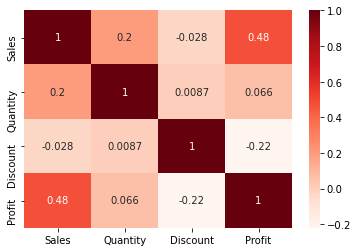

In [12]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Reds')

In [13]:
df = df.drop(['Postal Code'],axis = 1) 

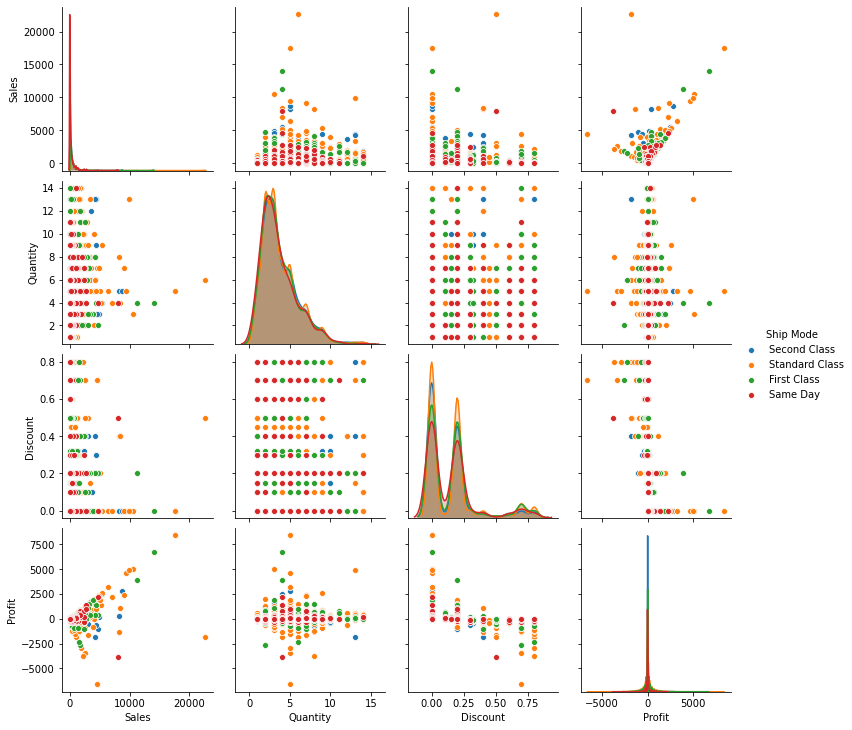

In [14]:
sns.pairplot(df, hue = 'Ship Mode')

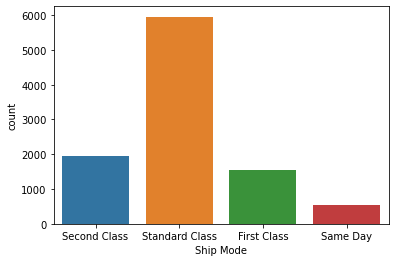

In [15]:
sns.countplot(x=df['Ship Mode'])

In [16]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [17]:
df['Segment'].value_counts()        #valuecounts for segment

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

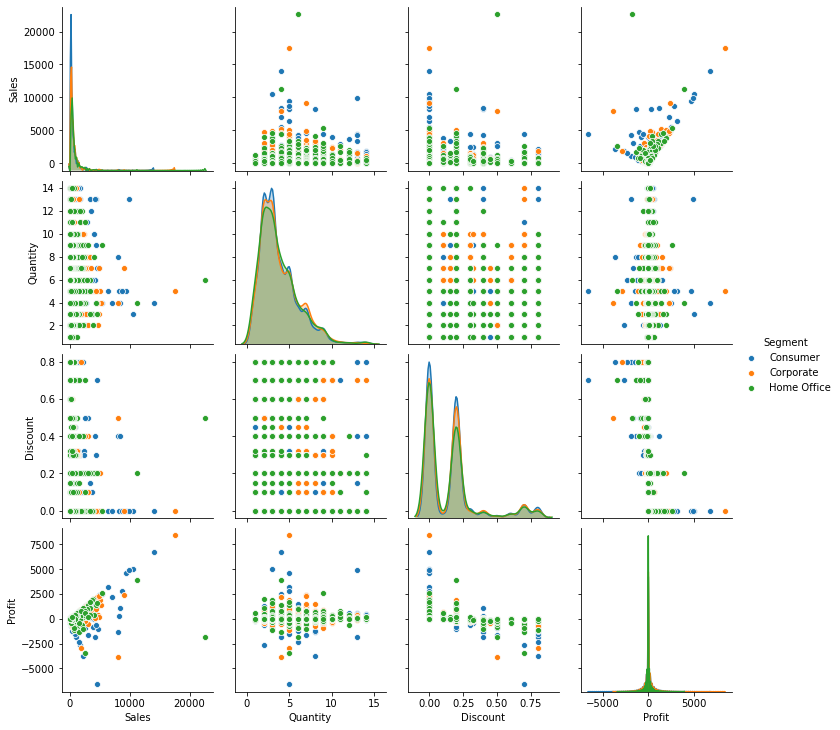

In [18]:
sns.pairplot(df,hue = 'Segment')     #plotting pair plot

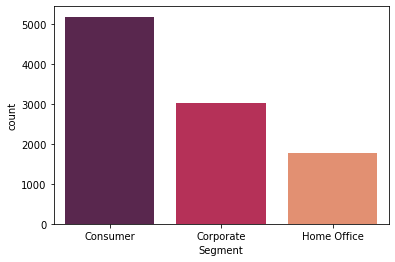

In [49]:
sns.countplot(x = 'Segment',data = df, palette = 'rocket')

In [20]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

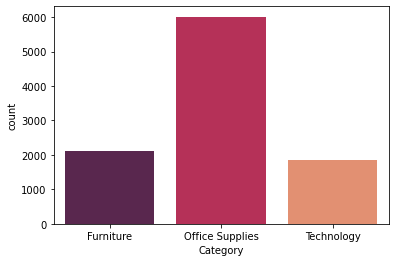

In [48]:
sns.countplot(x='Category',data=df,palette='rocket')

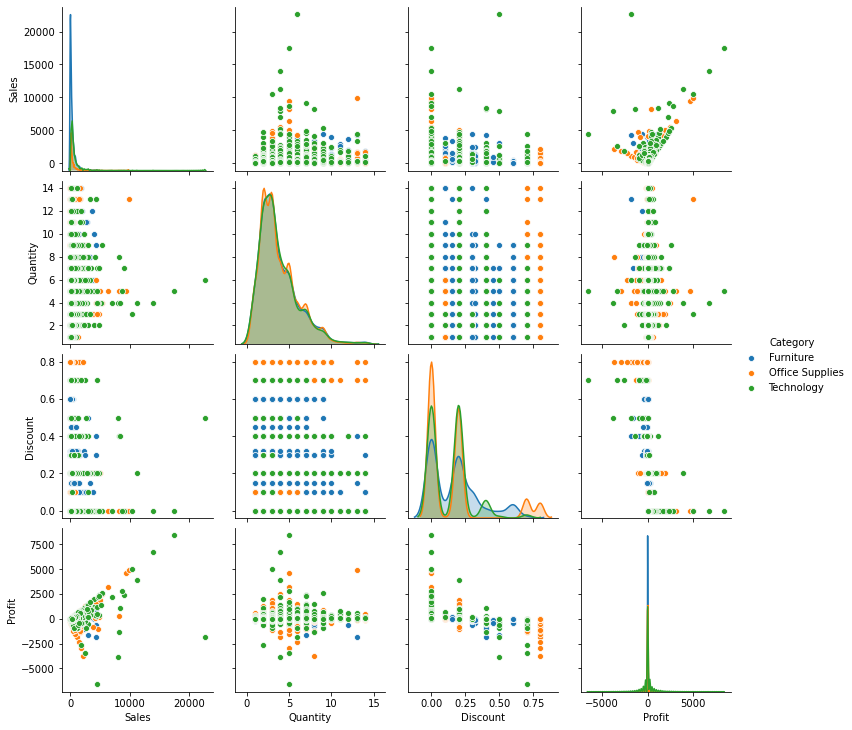

In [22]:
sns.pairplot(df,hue='Category')

In [23]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

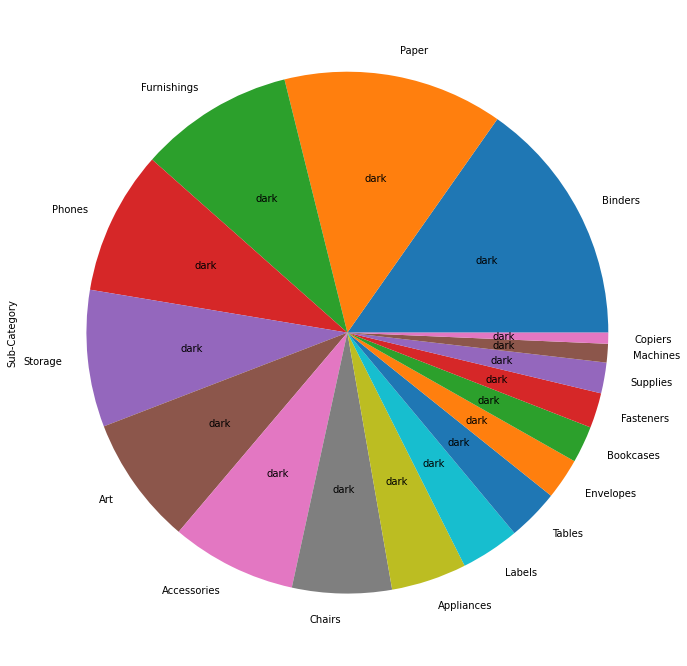

In [24]:
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(autopct='dark')
plt.show()

# Observations

### Observation 1

In [25]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

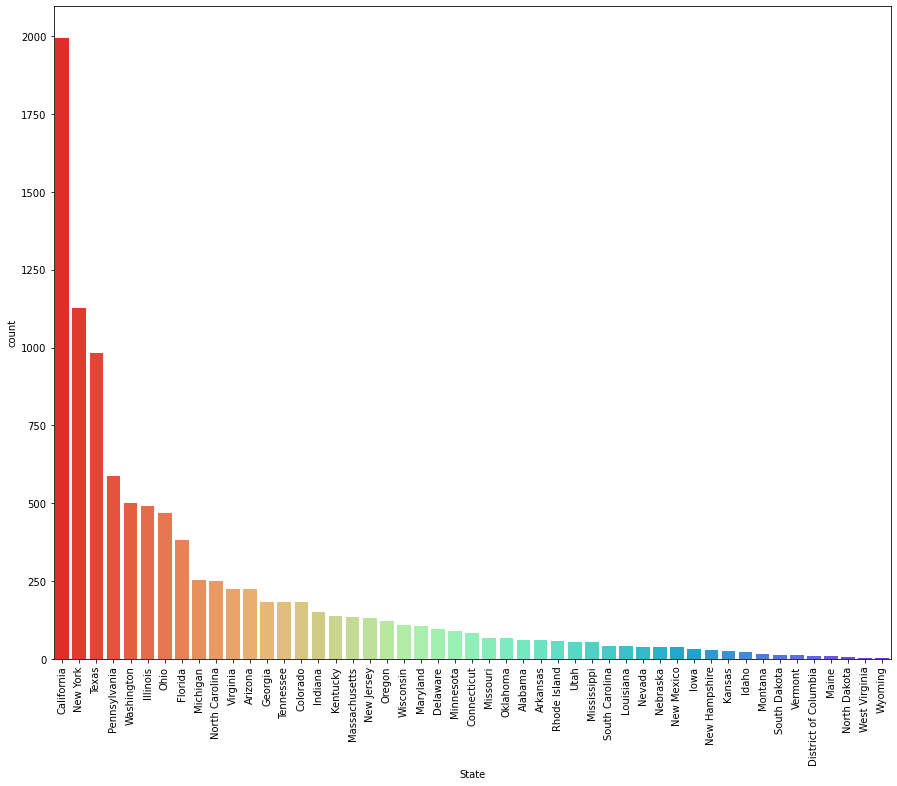

In [47]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,palette='rainbow_r',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Observation 2

Highest number of buyers are from California and New York

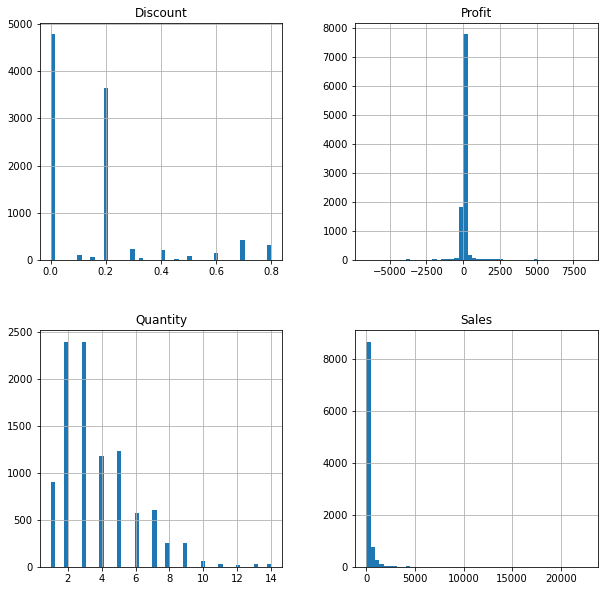

In [27]:
df.hist(figsize=(10,10),bins=50)
plt.show()

### Observation 3

- Most customers tends to buy quantity of 2 and 3
- Discount give maximum is 0 to 20 percent

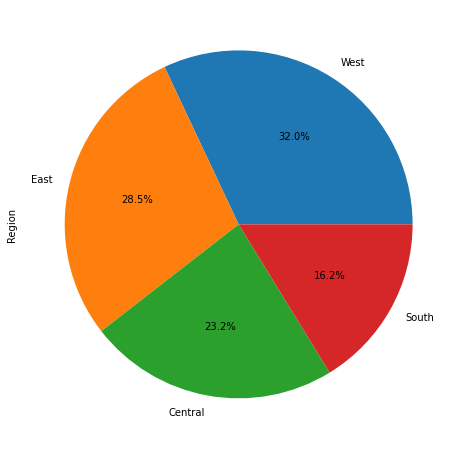

In [28]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

### Profit vs Discount

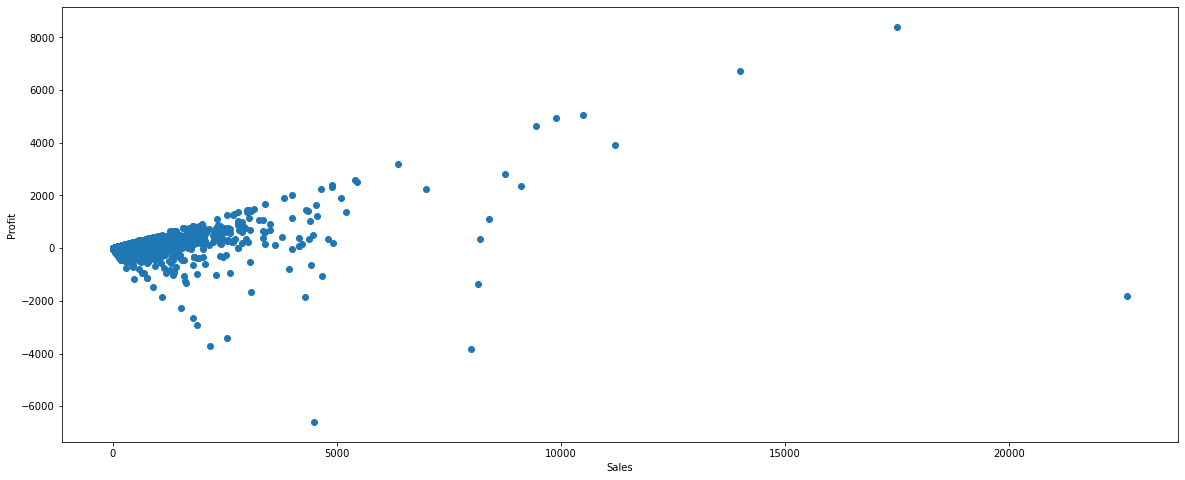

In [29]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

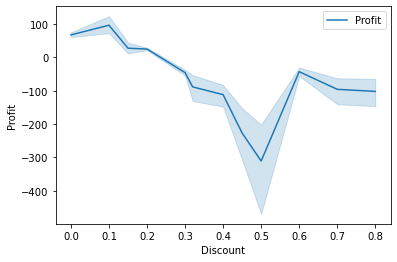

In [31]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

### Observation 4

- No correlation between profit and discount

### Profit vs Quantity

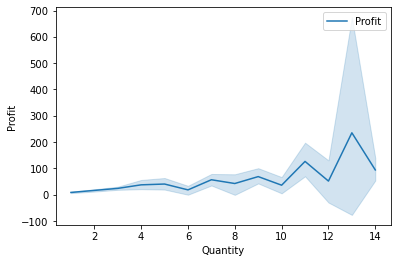

In [32]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

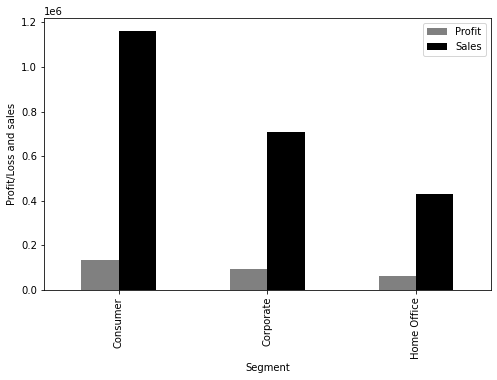

In [46]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['grey','black'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Observation 5

- Profit and sales are maximum in consumer segment and minimum in Home Office segment

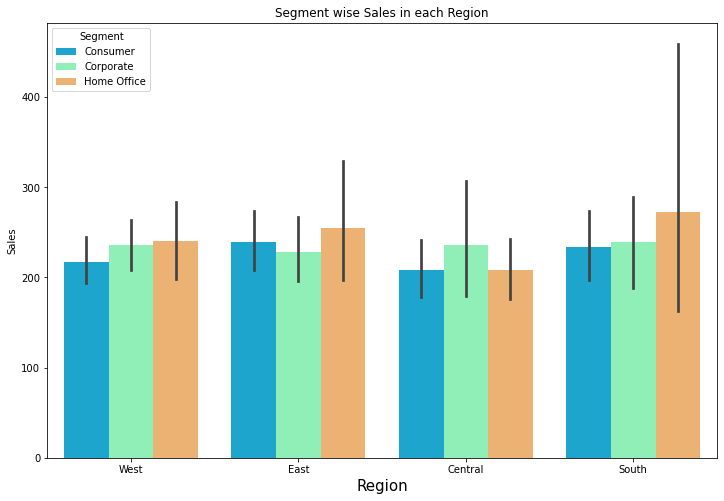

In [45]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rainbow')
plt.xlabel('Region',fontsize=15)
plt.show()

### Observation 6

- Segment wise sales are almost same in every region

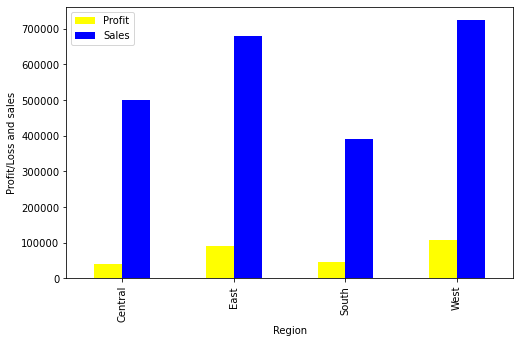

In [44]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['yellow','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Observation 7

- Profit and sales are maximum in West region and minimum in South Region

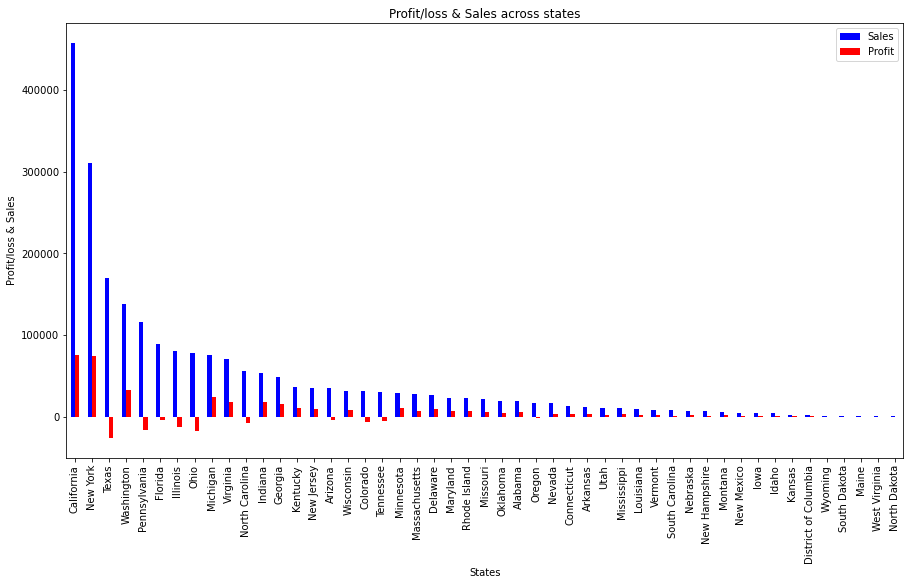

In [43]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','red'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

### Observation 8

- High profit is for California, New York
- Loss is for Texas, Pennsylvania, Ohio

In [37]:
t_states = df['State'].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

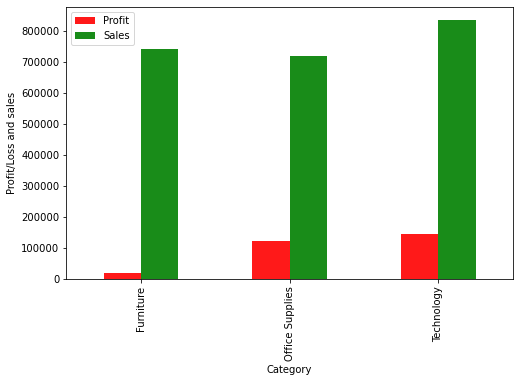

In [42]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['red','green'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Observation 9

#### As a business manager, try to find out the weak areas where you can work to make more profit?

- Technology and Office Supplies have high profit
- Furniture have less profit

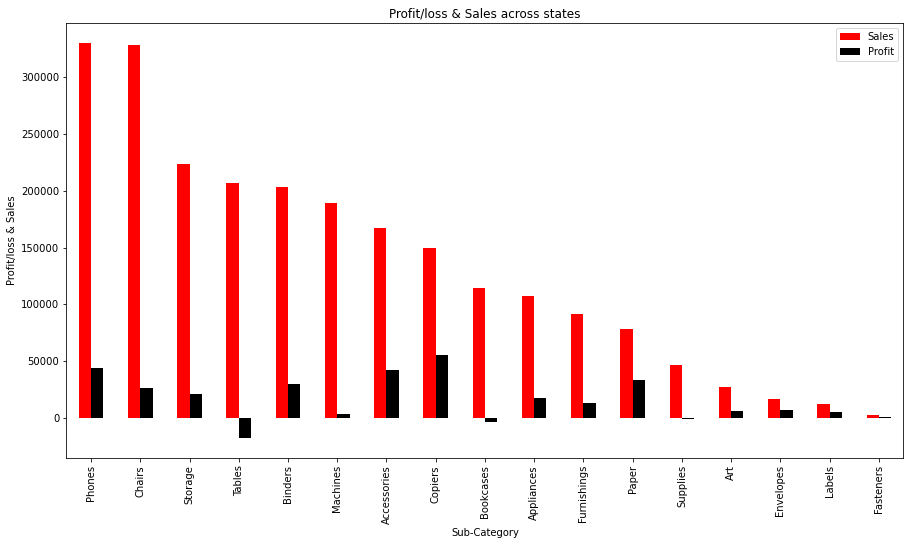

In [41]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','black'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

### Observation 10

- Phones sub-category have high sales.
- Chairs have high sales but less profit compared to phones
- Tables and Bookmarks sub-categories facing huge loss

### Task  3 Completed !

Thankyou for Checking Out!

               --Hardik Arora